<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/notebooks/embed_neighbors_transf_lme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Figure 7: Nonlinear velocity projections introduce distortions relative to linear PCA projection.

In this notebook, we examine the La Manno et al. human forebrain dataset, compute velocities, and embed them in PCA space. To test the sensitivity of the actual 2D cell-specific arrows to user-set hyperparameters, we repeat this analysis for a range of neighborhood sizes ($k=50, 100, 200$) and transformations applied in the transition kernel (default square-root, logarithm, and Boolean). 

Warning: the logarithmic procedure takes significantly more time than the others.

# Dependencies

In [1]:
import time
t1 = time.time()

In [2]:
## uncomment this cell if run in colab ##

%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
!pip install scanpy umap-learn

In [3]:
!mkdir -p figure
!mkdir -p data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp -r /content/drive/MyDrive/rnavelocity/hgForebrainGlut.loom /content/data

Here, the `hgForebrainGlut.loom` and `vis.py` files need to be uploaded.

In [6]:
from vis import * 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [7]:
## run locally ##
# %cd ../../GFCP_2021
# from vis import * 
# %cd notebooks

# Load data and preprocess

In [8]:
vlm = vcy.VelocytoLoom(loom_filepath="data/hgForebrainGlut.loom")
preprocess(vlm)

# Generate Figure 7

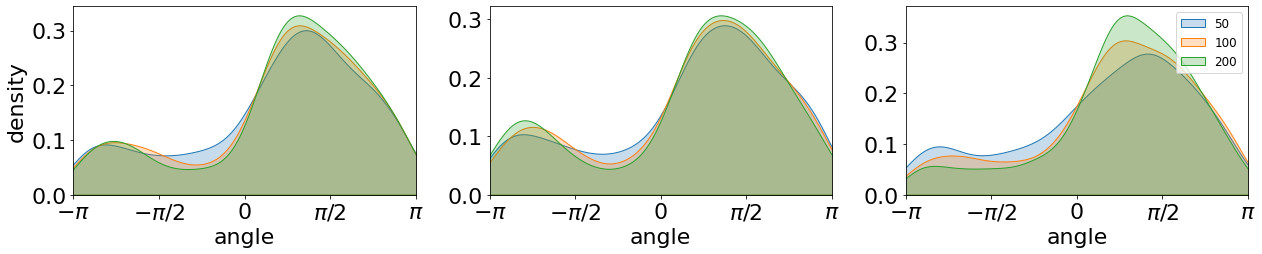

In [9]:

plt.rcParams.update({'font.size': 22})
fig, frac=angleDevPlots(vlm,Trans=["sqrt","log","bool"],n_neighs=[50,100,200])
plt.legend(loc=1 ,prop={'size': 12})
plt.show()


In [10]:
fig.savefig('figure/embed_neighbors_transf_lme_raw.png',dpi=600)

In [11]:
t2 = time.time()
print('Runtime: {:.2f} seconds.'.format(t2-t1))

Runtime: 2481.47 seconds.
